# Hypothesis 2

1. Rename this notebook to correct name `2-Name_Surname.ipynb`
2. Fit 3 linear models for regression target `__price_doc`: Linear regression, Lasso, Ridge
    - Find optimal regularization coefficient for each model (select more than 10+ experiments)
3. Fit 3 linear models for classification target `__churn`: Logistic Regression without regularization, Log Reg + L1, Log Reg + L2
    - Find optimal regularization coefficient for each model (select more than 10+ experiments)
4. Fill table below with metrics for all models (Please hold this table in the top of notebook)
5. Select best model one for regression and classification task and add it prediction to submission dataset (see code below)
6. Send submission csv file to me

Notes:
- You can get up to 1 point
- Use all new features which you created in hypothesis 1
- Deadline 24 March 18.00

# Metrics table

## Ridge is the best model for regression 

In [105]:
models = ['Linear Regression', 'Lasso', 'Ridge']
errors = [mse_linear_regression, mse_lasso, mse_ridge]

error_df = pd.DataFrame({'Model': models, 'MSE_Error': errors})
error_df

,Model,MSE_Error
0,Linear Regression,398.950516
1,Lasso,0.904640
2,Ridge,0.643323


## logistic_regression is the best model for classification

In [106]:
models = ['logistic_regression', 'logistic_regression_l1', 'logistic_regression_l2']
errors = [accuracy_logistic_regression, accuracy_logistic_regression_l1, accuracy_logistic_regression_l2]

error_df = pd.DataFrame({'Model': models, 'accuracy': errors})
error_df

,Model,accuracy
0,logistic_regression,0.924335
1,logistic_regression_l1,0.923359
2,logistic_regression_l2,0.804735


In [1]:
import pandas as pd 
import numpy as np 

In [2]:
train = pd.read_csv("../data/h2/train.csv")
test = pd.read_csv("../data/h2/test.csv")

In [3]:
# Remove the column 'f__house_age' from train_raw
train.drop(columns=['f__house_age'], inplace=True)

# Remove the column 'f__house_age' from submission
test.drop(columns=['f__house_age'], inplace=True)


In [4]:
train.head()

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__income_category_Less than $40K,f__income_category_Unknown,f__income_category_target_churn,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance
0,3.713837e-16,-7.764994e-16,0.978491,0.192173,-0.291179,0.173623,0.294846,-0.519139,1.246955,2.127038,...,1.064311,-0.248245,0.522108,-1.649597,-0.507744,-1.773843,0.514219,28.022145,-0.910987,-0.682169
1,3.713837e-16,-7.764994e-16,-1.434332,-0.684113,0.195253,0.167833,-0.238810,-0.519139,0.570351,0.338808,...,-0.939575,-0.248245,-0.697216,1.829985,-0.824830,-0.591262,0.599530,0.851930,-0.011830,0.482197
2,3.713837e-16,-7.764994e-16,1.293152,3.697314,-0.291179,0.966898,-0.806069,-0.519139,0.247580,0.176241,...,-0.939575,-0.248245,-0.697216,-1.990957,-0.390360,-1.470505,0.367409,0.658292,-0.809290,-0.904256
3,3.713837e-16,-7.764994e-16,0.851098,1.068458,-0.291179,-0.150635,-0.005074,-0.519139,2.216644,0.176241,...,-0.939575,-0.248245,-2.493620,0.906244,-0.691469,-0.486958,0.358060,-85.715613,-0.153495,-0.718291
4,3.713837e-16,-7.764994e-16,-0.490350,1.068458,2.951698,1.378012,-0.918679,-0.519139,0.288041,1.801905,...,1.064311,-0.248245,0.522108,0.658707,-0.807905,0.586855,1.459251,0.851930,0.259034,0.246374


In [5]:
test.head()

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__income_category_target_churn,__price_doc,__churn,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance
0,1.352851,1.195766,-0.671994,-0.685651,-0.234314,-2.158285,0.030654,1.322431,1.818989e-12,-0.011007,...,0.036059,0.0,0.0,-0.361585,-0.836489,0.339508,5.138130,1.328219,-0.651822,-0.355896
1,0.492178,1.195766,0.525274,0.243560,-0.098894,0.036025,-0.258511,-0.506486,1.818989e-12,-0.159979,...,-0.682948,0.0,0.0,-0.661494,-0.195068,9.482775,1.060685,-28.210698,-0.862099,-1.314192
2,-0.511940,-0.061531,-0.144686,-0.685651,0.104236,0.082837,-0.789502,-2.335403,1.818989e-12,0.584878,...,0.517550,0.0,0.0,-1.644017,-0.468821,-2.709209,0.860926,27.038018,-0.416897,-1.771519
3,0.635624,1.195766,0.464137,-0.685651,-0.302024,0.392966,-0.027322,-0.506486,1.818989e-12,-0.904835,...,0.036059,0.0,0.0,-1.661360,-0.705017,-0.029666,1.122473,-1.305912,-0.931714,-0.250877
4,5.082434,-1.318829,-0.107749,-0.685651,-0.234314,1.024927,0.329288,-0.506486,1.818989e-12,-0.606892,...,0.517550,0.0,0.0,0.140560,-0.197511,0.499814,0.674629,-28.210698,-0.122100,-0.017108


In [6]:
from sklearn.model_selection import train_test_split

X_regression = train.drop(columns=['__price_doc','__churn'])
y_regression = train['__price_doc']
X_classification = train.drop(columns=['__churn','__price_doc'])
y_classification = train['__churn']

In [7]:
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)
X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [8]:
print('X_regression_train: ',X_regression_train.shape)
print('y_regression_train: ',y_regression_train.shape)
print('X_regression_test: ',X_regression_test.shape)
print('y_regression_test: ',y_regression_test.shape)
print('*'*80)
print('X_classification_train: ',X_classification_train.shape)
print('y_classification_train: ',y_classification_train.shape)
print('X_classification_test: ',X_classification_test.shape)
print('y_classification_test: ',y_classification_test.shape)

X_regression_train:  (16386, 60)
y_regression_train:  (16386,)
X_regression_test:  (4097, 60)
y_regression_test:  (4097,)
********************************************************************************
X_classification_train:  (16386, 60)
y_classification_train:  (16386,)
X_classification_test:  (4097, 60)
y_classification_test:  (4097,)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# linear regression

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(X_regression_train, y_regression_train)

LinearRegression()

In [11]:
mse_linear_regression = mean_squared_error(y_regression_test, linear_regression.predict(X_regression_test))

In [12]:
mse_linear_regression

398.95051649211126

In [13]:
lasso = Lasso()
ridge = Ridge()

# lasso regression

In [14]:
param_grid = {'alpha': [0.0001 , 0.0003 , 0.00009 ,0.001, 0.003 , 0.009 , 0.01 , 0.03 , 0.09 , 0.1 , 0.3 , 0.9 , 1 ,3 , 10 , 30 , 100]}
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5 , return_train_score=True)
grid_search_lasso.fit(X_regression_train, y_regression_train)
lasso_best = grid_search_lasso.best_estimator_

sorted(grid_search_lasso.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_lasso.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', grid_search_lasso.best_score_)
print('Best Parameters are :', grid_search_lasso.best_params_)
print('Best Estimator is :', grid_search_lasso.best_estimator_)


C:\Users\ViztaEdu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.646e+02, tolerance: 1.329e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ViztaEdu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+00, tolerance: 1.345e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ViztaEdu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+00,

All Results are :
     mean_test_score  std_test_score             params  rank_test_score  \
0         -0.371338        1.355552  {'alpha': 0.0001}               16   
1         -0.370910        1.352625  {'alpha': 0.0003}               15   
2         -0.371394        1.355700   {'alpha': 9e-05}               17   
3         -0.369322        1.342301   {'alpha': 0.001}               14   
4         -0.357284        1.315959   {'alpha': 0.003}               13   
5         -0.327313        1.245779   {'alpha': 0.009}               12   
6         -0.322715        1.235220    {'alpha': 0.01}               11   
7         -0.283739        1.120360    {'alpha': 0.03}               10   
8         -0.101164        0.640258    {'alpha': 0.09}                9   
9         -0.073384        0.568445     {'alpha': 0.1}                8   
10         0.022649        0.002193     {'alpha': 0.3}                1   
11        -0.000103        0.000074     {'alpha': 0.9}                2   
12    

# Ridge regression

In [15]:
param_grid = {'alpha': [0.0001 , 0.0003 , 0.00009 ,0.001, 0.003 , 0.009 , 0.01 , 0.03 , 0.09 , 0.1 , 0.3 , 0.9 , 1 ,3 , 10 , 30 , 100]}
grid_search_ridge  = GridSearchCV(ridge, param_grid, cv=5 , return_train_score=True)
grid_search_ridge.fit(X_regression_train, y_regression_train)
ridge_best = grid_search_ridge.best_estimator_

sorted(grid_search_ridge.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_ridge.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', grid_search_ridge.best_score_)
print('Best Parameters are :', grid_search_ridge.best_params_)
print('Best Estimator is :', grid_search_ridge.best_estimator_)

All Results are :
     mean_test_score  std_test_score             params  rank_test_score  \
0         -0.372026        1.357045  {'alpha': 0.0001}               13   
1         -0.372025        1.357045  {'alpha': 0.0003}               12   
2         -0.372026        1.357045   {'alpha': 9e-05}               14   
3         -0.372024        1.357043   {'alpha': 0.001}               11   
4         -0.372021        1.357040   {'alpha': 0.003}               10   
5         -0.372012        1.357031   {'alpha': 0.009}                9   
6         -0.372010        1.357029    {'alpha': 0.01}                8   
7         -0.371983        1.356997    {'alpha': 0.03}                7   
8         -0.371934        1.356906    {'alpha': 0.09}                5   
9         -0.371930        1.356891     {'alpha': 0.1}                4   
10        -0.371981        1.356619     {'alpha': 0.3}                6   
11        -0.372487        1.355947     {'alpha': 0.9}               15   
12    

# select best model

In [17]:
mse_linear_regression = mean_squared_error(y_regression_test, linear_regression.predict(X_regression_test))
print('mse_linear_regression :' , mse_linear_regression )
print('*'*80)
mse_lasso = mean_squared_error(y_regression_test, lasso_best.predict(X_regression_test))
print('mse_lasso :' , mse_lasso )
print('*'*80)
mse_ridge = mean_squared_error(y_regression_test, ridge_best.predict(X_regression_test))
print('mse_ridge :' , mse_ridge )

mse_linear_regression : 398.95051649211126
********************************************************************************
mse_lasso : 0.9046395062460308
********************************************************************************
mse_ridge : 0.643323382933066


# classification

In [18]:
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression_l1 = LogisticRegression(penalty='l1',solver='liblinear', max_iter=10000)
logistic_regression_l2 = LogisticRegression(penalty='l2', max_iter=10000)

In [19]:
# 1. Check Target Variable Type
print("Unique values in y_classification_train:", y_classification_train.unique())

# 2. Ensure Proper Encoding
# If y_classification_train is continuous, consider discretizing it into classes using binning or one-hot encoding.

# 3. Check Data Preparation Steps
# Review the preprocessing steps applied to y_classification_train to ensure it is appropriately formatted for classification.

# 4. Inspect Data Loading
# Double-check the data loading process to ensure the target variable is loaded correctly.

# 5. Debugging Model Parameters
# Review the parameters passed to LogisticRegression to ensure they are correctly configured for classification.

# If y_classification_train is originally continuous, you can discretize it using binning:
from sklearn.preprocessing import KBinsDiscretizer

# Define the number of bins
num_bins = 5


Unique values in y_classification_train: [ 2.27982004 -0.43863111]


In [20]:
from sklearn.preprocessing import KBinsDiscretizer

# Define the number of bins
num_bins = 5

# Perform binning on the target variable
binning = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
y_classification_train_binned = binning.fit_transform(y_classification_train.values.reshape(-1, 1))

# Convert back to a 1D array
y_classification_train_binned = y_classification_train_binned.flatten()

# Now, y_classification_train_binned contains discrete classes suitable for classification


C:\Users\ViztaEdu\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


# logistic regression without regularization

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the threshold for binary classification
threshold = 0.5

# Convert continuous values to binary classes based on the threshold
y_classification_train_binary = (y_classification_train > threshold).astype(int)

# Define the parameter grid for logistic regression
param_grid = {'C': [0.0001, 0.0003, 0.00009, 0.001, 0.003, 0.009, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9, 1, 3, 10, 30, 100]}

# Initialize logistic regression model
logistic_regression = LogisticRegression(max_iter=10000)

# Initialize grid search with logistic regression
grid_search_log = GridSearchCV(logistic_regression, param_grid, cv=5, return_train_score=True)

# Fit the grid search to find the best model
grid_search_log.fit(X_classification_train, y_classification_train_binary)

# Get the best estimator from the grid search
log_best = grid_search_log.best_estimator_

# Display results
print('All Results are :\n', grid_search_log.cv_results_)
print('Best Score is :\n', grid_search_log.best_score_)
print('Best Parameters are :\n', grid_search_log.best_params_)
print('Best Estimator is :\n', grid_search_log.best_estimator_)


All Results are :
 {'mean_fit_time': array([0.16368704, 0.22224708, 0.16192331, 0.31538143, 0.39365993,
       0.55825229, 0.59347639, 0.69840508, 0.87956543, 0.9862021 ,
       1.10533171, 1.29736481, 1.24920573, 1.2289917 , 1.58907018,
       1.67959242, 1.95314655]), 'std_fit_time': array([0.01699851, 0.02412011, 0.01890506, 0.02506441, 0.02771995,
       0.09593487, 0.05095164, 0.05928846, 0.07723004, 0.07474793,
       0.1209162 , 0.22377266, 0.15783859, 0.16697462, 0.63200039,
       0.59127415, 0.59718452]), 'mean_score_time': array([0.0053977 , 0.00372167, 0.00767508, 0.01108179, 0.00885615,
       0.00950246, 0.00400195, 0.00310574, 0.01224761, 0.01039557,
       0.00787063, 0.0059279 , 0.00944548, 0.00937419, 0.00541792,
       0.00835681, 0.00937319]), 'std_score_time': array([0.00548211, 0.00537255, 0.007003  , 0.00606181, 0.00729374,
       0.00781292, 0.0050643 , 0.00621147, 0.00727748, 0.00736312,
       0.00698613, 0.00727791, 0.0077142 , 0.00569065, 0.00589033,
       

In [22]:
##import numpy as np

# Assuming y_classification_train is your continuous target variable

# Define bins for discretization
##bins = np.linspace(min(y_classification_train), max(y_classification_train), num=5)  # Adjust num as needed

# Discretize the target variable into classes
##y_discrete = np.digitize(y_classification_train, bins)

# Now y_discrete contains discrete classes suitable for classification
# Proceed with fitting your classifier using y_discrete as the target variable


# LogisticRegression L1

In [23]:
# Check the target variable
print(y_classification_train.head())  # Check the first few rows to ensure it contains discrete classes

# Check for missing values in the target variable
print(y_classification_train.isnull().sum())  # Check if there are any missing values

# Check for missing values in the features
print(X_classification_train.isnull().sum())  # Check if there are any missing values in the features

# Verify the model
print(logistic_regression_l1)  # Print the model to verify it's a classifier

# If necessary, preprocess the target variable to ensure it contains discrete classes
# For example, if it's continuous, you may need to bin the values into discrete intervals or use label encoding

# Proceed with fitting the model once the above checks are done


5207     2.279820
1989    -0.438631
6286     2.279820
7816    -0.438631
17190    2.279820
Name: __churn, dtype: float64
0
max_floor                                0
state                                    0
total_revolving_bal                      0
market_count_1500                        0
leisure_count_3000                       0
total_ct_chng_q4_q1                      0
railroad_station_walk_km                 0
contacts_count_12_mon                    0
0_17_all                                 0
trc_count_2000                           0
build_count_wood                         0
credit_limit                             0
total_trans_ct                           0
leisure_count_5000                       0
life_sq                                  0
cafe_count_1000_price_1000               0
mkad_km                                  0
school_education_centers_top_20_raion    0
avg_utilization_ratio                    0
public_transport_station_min_walk        0
customer_age      

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming the data and model details are provided
# Here, y_classification_train represents the target variable

# Define a threshold for binarization
threshold = 0  # Example threshold value, adjust as needed

# Binarize the target variable
y_classification_train_binarized = (y_classification_train > threshold).astype(int)

# Check the distribution of binarized target variable
print(y_classification_train_binarized.value_counts())

# Define logistic regression model
logistic_regression_l1 = LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')

# Define parameter grid for grid search
param_grid = {'C': [0.0001, 0.0003, 0.00009, 0.001, 0.003, 0.009, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9, 1, 3, 10, 30, 100]}

# Perform grid search
grid_search_log_l1 = GridSearchCV(logistic_regression_l1, param_grid, cv=5, return_train_score=True)
grid_search_log_l1.fit(X_classification_train, y_classification_train_binarized)

# Fetch best estimator
log_l1_best = grid_search_log_l1.best_estimator_

# Display results
sorted(grid_search_log_l1.cv_results_.keys())
GridSearchResults = pd.DataFrame(grid_search_log_l1.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults)
print('Best Score is :', grid_search_log_l1.best_score_)
print('Best Parameters are :', grid_search_log_l1.best_params_)
print('Best Estimator is :', grid_search_log_l1.best_estimator_)


__churn
0    13724
1     2662
Name: count, dtype: int64
All Results are :
     mean_test_score  std_test_score         params  rank_test_score  \
0          0.480166        0.008608  {'C': 0.0001}               16   
1          0.742097        0.007883  {'C': 0.0003}               15   
2          0.480105        0.008547   {'C': 9e-05}               17   
3          0.872330        0.002418   {'C': 0.001}               14   
4          0.914561        0.006010   {'C': 0.003}               13   
5          0.923349        0.005392   {'C': 0.009}               10   
6          0.923654        0.004933    {'C': 0.01}                3   
7          0.923593        0.004204    {'C': 0.03}                5   
8          0.923532        0.004394    {'C': 0.09}                8   
9          0.923593        0.004343     {'C': 0.1}                5   
10         0.923166        0.003727     {'C': 0.3}               12   
11         0.923349        0.003807     {'C': 0.9}                9   
12

# LogisticRegression L2

In [26]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer

# Check the data type and distribution of the target variable
print(y_classification_train.dtype)
print(y_classification_train.describe())

# If the target variable is continuous, discretize it into classes
# Example using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_classification_train_discrete = discretizer.fit_transform(y_classification_train.values.reshape(-1, 1))

# Convert the target variable into a categorical variable with discrete classes
# Assuming y_classification_train_discrete contains the discretized target variable
# Replace y_classification_train with y_classification_train_discrete in the code below

# Define the parameter grid
param_grid = {'C': [0.0001, 0.0003, 0.00009, 0.001, 0.003, 0.009, 0.01, 0.03, 0.09, 0.1, 0.3, 0.9, 1, 3, 10, 30, 100]}

# Initialize the GridSearchCV
grid_search_log_l2 = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV
grid_search_log_l2.fit(X_classification_train, y_classification_train_discrete.ravel())

# Fetch best estimator
log_l2_best = grid_search_log_l2.best_estimator_

# Display results
print('All Results are :\n', pd.DataFrame(grid_search_log_l2.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']])
print('Best Score is:', grid_search_log_l2.best_score_)
print('Best Parameters are:', grid_search_log_l2.best_params_)
print('Best Estimator is:', grid_search_log_l2.best_estimator_)


float64
count    16386.000000
mean         0.002997
std          1.002781
min         -0.438631
25%         -0.438631
50%         -0.438631
75%         -0.438631
max          2.279820
Name: __churn, dtype: float64


C:\Users\ViztaEdu\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


All Results are :
     mean_test_score  std_test_score         params  rank_test_score  \
0          0.867448        0.007587  {'C': 0.0001}               16   
1          0.910411        0.006020  {'C': 0.0003}               15   
2          0.860734        0.008674   {'C': 9e-05}               17   
3          0.919748        0.003785   {'C': 0.001}               14   
4          0.922311        0.003426   {'C': 0.003}               13   
5          0.923532        0.003961   {'C': 0.009}                4   
6          0.923410        0.003944    {'C': 0.01}                8   
7          0.923715        0.004205    {'C': 0.03}                1   
8          0.923166        0.003543    {'C': 0.09}               12   
9          0.923288        0.003464     {'C': 0.1}               10   
10         0.923227        0.003962     {'C': 0.3}               11   
11         0.923532        0.003714     {'C': 0.9}                5   
12         0.923593        0.003663       {'C': 1}        

# select best model

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert continuous values to binary format
y_classification_test_binary = np.where(y_classification_test >= 0.5, 1, 0)

# Now, you can use y_classification_test_binary for evaluation
accuracy_logistic_regression = accuracy_score(y_classification_test_binary, log_best.predict(X_classification_test))
print('accuracy_logistic_regression:', accuracy_logistic_regression)

accuracy_logistic_regression_l1 = accuracy_score(y_classification_test_binary, log_l1_best.predict(X_classification_test))
print('accuracy_logistic_regression_l1:', accuracy_logistic_regression_l1)

accuracy_logistic_regression_l2 = accuracy_score(y_classification_test_binary, log_l2_best.predict(X_classification_test))
print('accuracy_logistic_regression_l2:', accuracy_logistic_regression_l2)


accuracy_logistic_regression: 0.9243348791798878
accuracy_logistic_regression_l1: 0.9233585550402734
accuracy_logistic_regression_l2: 0.8047351720771296


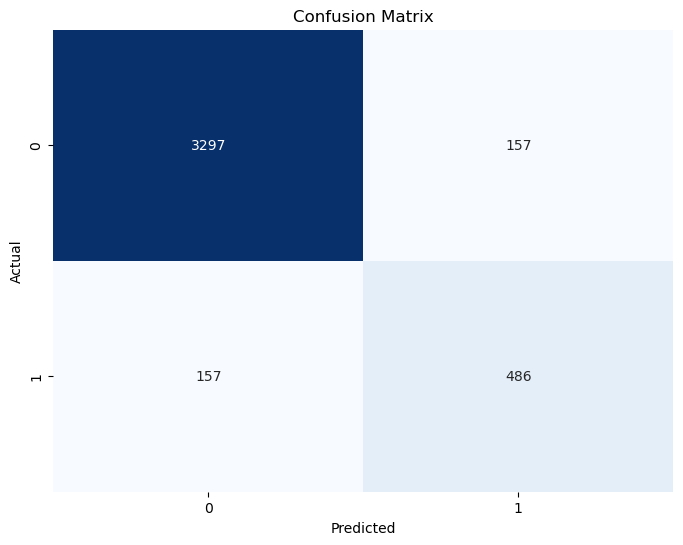

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained a logistic regression model named log_best, log_l1_best, or log_l2_best
# Choose the appropriate model based on your previous analysis

# For example, if you want to use the best logistic regression model obtained from L2 regularization
y_pred = log_l2_best.predict(X_classification_test)

# Convert continuous values to binary format
y_classification_test_binary = np.where(y_classification_test >= 0.5, 1, 0)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(y_classification_test_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


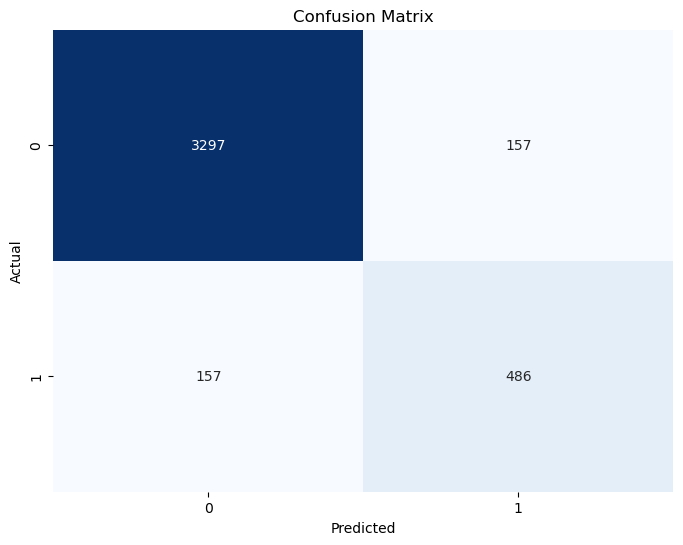

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert continuous values to binary format
y_classification_test_binary = np.where(y_classification_test >= 0.5, 1, 0)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(y_classification_test_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


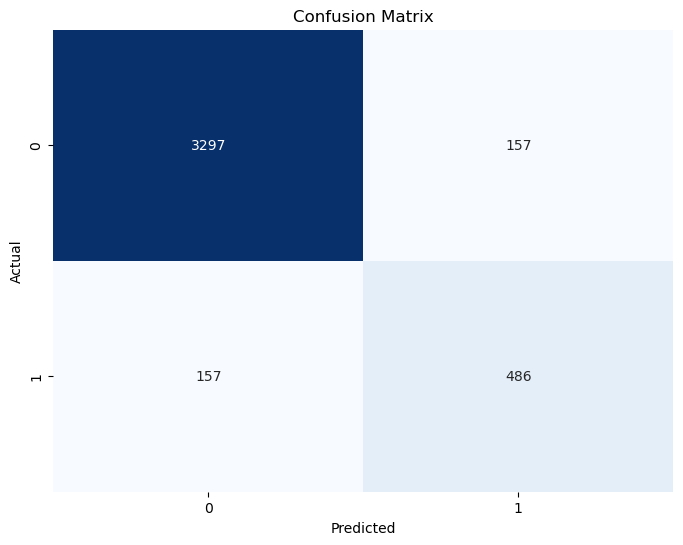

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert continuous values to binary format
y_classification_test_binary = np.where(y_classification_test >= 0.5, 1, 0)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

cm = confusion_matrix(y_classification_test_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
# Assuming X_classification_train contains the features used for training

# Ensure consistent feature names
test = test[X_classification_train.columns]

# Reorder columns if necessary (if the order is different)
test = test[X_classification_train.columns]

# Handle missing values if any
# If there are missing values, fill them with appropriate values or impute them

# Now you can use the predict_proba method
classification_predictions = log_best.predict_proba(test)


In [33]:
classification_predictions = log_best.predict_proba(test)

In [34]:
classification_predictions

array([[1.11791408e-01, 8.88208592e-01],
       [9.98574448e-01, 1.42555224e-03],
       [9.96823709e-01, 3.17629057e-03],
       ...,
       [9.99925528e-01, 7.44719450e-05],
       [9.00604334e-01, 9.93956662e-02],
       [9.20074472e-01, 7.99255277e-02]])

In [35]:
pro = classification_predictions[:, 1]

In [36]:
pro

array([8.88208592e-01, 1.42555224e-03, 3.17629057e-03, ...,
       7.44719450e-05, 9.93956662e-02, 7.99255277e-02])

In [37]:
regression_predictions = ridge_best.predict(test)

In [38]:
regression_predictions

array([ 0.31331318, -0.33011212, -0.44803371, ..., -0.62260187,
        0.36235022, -0.30719143])

In [39]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

In [40]:
test['__price_predict']=regression_predictions
test['__churn_prob']=pro
test['__priority'] = test.apply(alg1, axis=1)
test.head()

,max_floor,state,total_revolving_bal,market_count_1500,leisure_count_3000,total_ct_chng_q4_q1,railroad_station_walk_km,contacts_count_12_mon,0_17_all,trc_count_2000,...,f__total_utilization_ratio,f__distance_to_public_transport,f__total_cafe_sum_avg_price,f__population_density,f__inactive_months_ratio,f__health_facility_distance,f__transport_and_market_distance,__price_predict,__churn_prob,__priority
0,1.352851,1.195766,-0.671994,-0.685651,-0.234314,-2.158285,0.030654,1.322431,1.818989e-12,-0.011007,...,-0.361585,-0.836489,0.339508,5.138130,1.328219,-0.651822,-0.355896,0.313313,0.888209,0.313313
1,0.492178,1.195766,0.525274,0.243560,-0.098894,0.036025,-0.258511,-0.506486,1.818989e-12,-0.159979,...,-0.661494,-0.195068,9.482775,1.060685,-28.210698,-0.862099,-1.314192,-0.330112,0.001426,-0.330112
2,-0.511940,-0.061531,-0.144686,-0.685651,0.104236,0.082837,-0.789502,-2.335403,1.818989e-12,0.584878,...,-1.644017,-0.468821,-2.709209,0.860926,27.038018,-0.416897,-1.771519,-0.448034,0.003176,-0.448034
3,0.635624,1.195766,0.464137,-0.685651,-0.302024,0.392966,-0.027322,-0.506486,1.818989e-12,-0.904835,...,-1.661360,-0.705017,-0.029666,1.122473,-1.305912,-0.931714,-0.250877,-0.445678,0.000014,-0.445678
4,5.082434,-1.318829,-0.107749,-0.685651,-0.234314,1.024927,0.329288,-0.506486,1.818989e-12,-0.606892,...,0.140560,-0.197511,0.499814,0.674629,-28.210698,-0.122100,-0.017108,1.799781,0.000085,1.799781


In [41]:
columns_to_keep = ['__price_predict', '__churn_prob','__priority']
test = test.drop(columns=test.columns.difference(columns_to_keep))
test.head()

,__price_predict,__churn_prob,__priority
0,0.313313,0.888209,0.313313
1,-0.330112,0.001426,-0.330112
2,-0.448034,0.003176,-0.448034
3,-0.445678,0.000014,-0.445678
4,1.799781,0.000085,1.799781


In [42]:
# Replace negative values with 0 for all columns
test[test < 0] = 0

# Save the DataFrame to a CSV file
test.to_csv('2-Albert_Dolvo.csv', index=False)
